# Overview

1. Announcements
2. Introduction to Unit 2
3. Linear regression
4. Baseline for linear regression
5. Using scikit learn for linear regression
6. Interpreting coefficients
7. Discuss project module


# Lambda School Data Science - Unit 2 Sprint 1 Module 1

# I. Wrangle Data

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# This allows you to pull data from github or load from a 
# local directory depending on where you are working.
import sys
if 'google.colab' in sys.modules:
  DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
else:
  DATA_PATH = '..../data/'  #/Users/nivi/Downloads/dengue_traindata.csv

In [ ]:
filepath = DATA_PATH + 'condos/tribeca.csv'

In [ ]:
# Wrangle function that cleans up our data 
def wrangle(filepath):

  # Load the csv file, convert the date column to a datetime object and set it as our index.
  df = pd.read_csv(filepath,parse_dates=['SALE_DATE'], index_col='SALE_DATE')

  # We remove columns that are constant for all the samples or those columns that 
  # have a very high cardinality
  cols_to_remove = ['NEIGHBORHOOD','BUILDING_CLASS_CATEGORY','ADDRESS','APARTMENT_NUMBER']
  df.drop(columns=cols_to_remove, inplace = True) # We do the inplace parameter so that the df is updated.


  return df

In [ ]:
# Call the wrangle function
df = wrangle(filepath)

In [ ]:
df['ZIP_CODE'] = df['ZIP_CODE'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ZIP_CODE           90 non-null     float64       
 1   GROSS_SQUARE_FEET  90 non-null     float64       
 2   YEAR_BUILT         90 non-null     float64       
 3   SALE_PRICE         90 non-null     int64         
 4   SALE_DATE          90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.6 KB


In [ ]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013,1840.0,1909.0,2800000
2019-01-07,10004,1759.0,0.0,2650000
2019-01-09,10004,1190.0,2005.0,1005000
2019-01-10,0,1088.0,2006.0,1678000
2019-01-11,10280,873.0,0.0,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [ ]:
# We split our data into feature matrix X and target variable y
X = df[['GROSS_SQUARE_FEET']] # note the double brackets
y = df['SALE_PRICE']

In [ ]:
X.shape #2D matrix

(90, 1)

In [ ]:
y.shape #vector

(90,)

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [ ]:
# Import library to calculate MAE
from sklearn.metrics import mean_absolute_error

In [ ]:
# Printing out the baseline prediction which is the mean of our target variable.
print('Mean Sale Price:', y.mean())

# Creating an array with the mean value because for every data point, our baseline prediction is the same.
y_pred = [y.mean()]*len(y) 

print('The MAE for our baseline method is: ', mean_absolute_error(y,y_pred))

Mean Sale Price: 3928736.3666666667
The MAE for our baseline method is:  2783380.1977777784


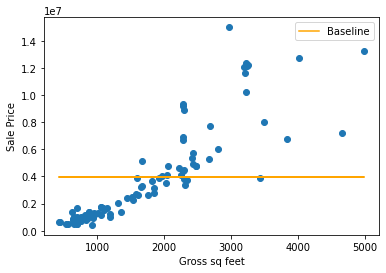

In [ ]:
# Scatter plot to visualize the baseline
plt.scatter(X,y)
plt.plot(X,y_pred,label='Baseline', color = 'orange')
plt.xlabel('Gross sq feet')
plt.ylabel('Sale Price')
plt.legend();

# IV. Build Model

y = beta1*x1 + beta2*x2 +...

In [ ]:
# Step 1: Import the predictor
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate the predictor
model_lr = LinearRegression()

# Step 3: Fit my model to the data
model_lr.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

In [ ]:
# Predict the output for our data X.
y_pred_lr = model_lr.predict(X)

# VI. Communicate Results

Plot model

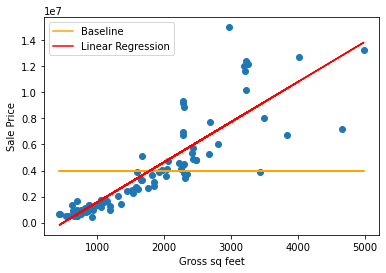

In [ ]:
# Plotting baseline and our model to interpret the differences between the two methods.
plt.scatter(X,y)
plt.plot(X,y_pred,label='Baseline', color = 'orange')
plt.plot(X,y_pred_lr, label = 'Linear Regression', color = 'red')
plt.xlabel('Gross sq feet')
plt.ylabel('Sale Price')
plt.legend();

In [ ]:
# Calculate the MAE for our linear regression model
print('The MAE for our baseline method is: ', mean_absolute_error(y,y_pred_lr))

The MAE for our baseline method is:  1176817.9930150746


What are our beta coefficients?

In [ ]:
# We derive our intercept and coefficient from our model
intercept = round(model_lr.intercept_)
coef = round(model_lr.coef_[0])

price_hat = intercept + coef * 'sqft'

In [ ]:
# Printing our final equation using intercept and coef
print(f'PRICE = {intercept}+{coef}*SQFT')

PRICE = -1505364+3076*SQFT
